# Introduction
# Eigenfaces and Principal Component Analysis (PCA)

In this notebook, we will explore the concept of Eigenfaces, which are eigenvectors used in the computer vision problem of human face recognition. We will see how PCA can be applied to high-dimensional data like images to reduce the dimensionality while preserving as much variability as possible.

## Learning Objectives
- Understand the steps involved in performing PCA on image data.
- Learn how to reconstruct images from their reduced dimensional representations.
- Visualize how different numbers of components affect the reconstruction quality.

Please execute each cell in sequence and follow along with the comments and markdown cells for a better understanding of each step.

In [34]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def display_and_process_images(relative_path: str, num_images_to_display: int = 10, image_size: tuple = (120, 120)):
    """
    Display a specified number of images from a folder in a grid and prepare all images for PCA.

    Args:
        - folder_path (str): relative path to the folder containing the images.
        - num_images_to_display (int): Number of images to display in a grid.
        - image_size (tuple): Size to which images should be resized (width, height).
        
    Returns:
        tuple: A tuple containing the list of all original images, the numpy array of images for PCA, and the mean image.
    """
    original_images = []
    input_vector = []
    displayed_images = 0
    folder_path = os.getcwd() + relative_path

    # Determine the grid size for plotting the specified number of images
    grid_size = int(np.ceil(np.sqrt(num_images_to_display)))
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 2, grid_size * 2))
    axes = axes.flatten()

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Check for image files
            with Image.open(os.path.join(folder_path, filename)) as img:
                # Resize image and convert to numpy array
                img_resized = img.resize(image_size)
                img_array = np.array(img_resized)
                # Append original images and flattened image to the lists
                original_images.append(img_array)
                input_vector.append(img_array.flatten())
                # Display the image if within the specified number
                if displayed_images < num_images_to_display:
                    axes[displayed_images].imshow(img_array)
                    axes[displayed_images].axis('off')  # Hide the axes
                    displayed_images += 1

    # Hide any remaining axes without images
    for ax in axes[displayed_images:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    # Convert the list of images to a 2D numpy array for PCA
    data = np.array(input_vector)
    # Calculate the mean image
    mean_img = np.mean(data, axis=0)

    return original_images, data, mean_img


### Display Sample Images

Before we dive into PCA, let's take a look at some sample images from our dataset. It's important to understand the kind of data we are working with. In the following cell, we will display some images of faces that we will later use to extract eigenfaces.

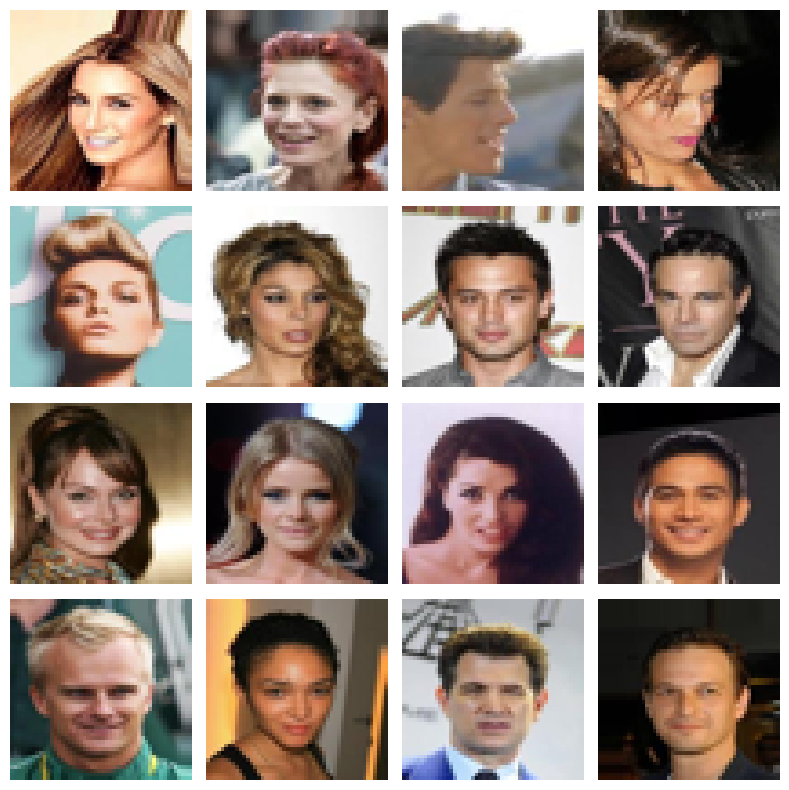

(500, 7500)

In [36]:
# Set the path to dataset
# images_path = "/archive/img_align_celeba/img_align_celeba"
images_path = "/dataset_500"

# Set the image size (the bigger, the more it will take to perform pca)
image_size = (50, 50)

# Define the number of images to display on the grid
num_images = 16

# Create the dataset and visualize some samples
original_images, input_vector, mean_img = display_and_process_images(relative_path=images_path, num_images_to_display=num_images, image_size=image_size)

# Verify the shape of the input vector
input_vector.shape

## Principal Component Analysis (PCA) for Eigenfaces

Principal Component Analysis (PCA) is a statistical procedure that utilizes an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. When applied to facial images, the principal components are known as 'eigenfaces', which are the directions in which the images differ the most.

### PCA Process Explained

1. **Normalization**: The first step in PCA is to normalize the data. This involves subtracting the mean from each feature. The mean subtraction ensures that the PCA looks for patterns in the variance of the data, centralizing the data around the origin in the multidimensional space.

2. **Covariance Matrix**: The next step is to calculate the covariance matrix of the normalized data. The covariance matrix captures the variance and the relationship between the different dimensions of the data. It is a key component in understanding how dimensions correlate with each other.

3. **Eigenvalues and Eigenvectors**: We then compute the eigenvalues and eigenvectors of the covariance matrix. The eigenvalues tell us how much variance there is in the data for each eigenvector direction. The eigenvectors, which are the principal components in PCA, give us the directions of maximum variance.

4. **Sorting**: The eigenvalues and corresponding eigenvectors are sorted in descending order. This is done because we are often interested in the principal components that explain the most variance, which are associated with the largest eigenvalues.

5. **Component Selection**: We select the top `num_components` eigenvectors as our principal components. This is the dimensionality reduction step where we choose to keep only the features that contain the most information about our dataset.

6. **Projection**: Finally, the data is projected onto the new feature space formed by the selected eigenvectors. This results in a transformed dataset where each row is now represented in terms of the principal components.

### Outputs of the PCA Function

The function returns a tuple with three elements:

- **Projected Data**: This is the original data transformed into the new feature space. Each observation is now expressed as a combination of the top principal components. We would expect this to have the same number of rows as the original data but with `num_components` columns.

- **Eigenvalues**: These values measure the amount of variance explained by each of the principal components. We expect the eigenvalues to be sorted in descending order, with the largest values first.

- **Eigenvectors**: Also known as the principal components, these are the directions in which the data varies the most. The eigenvectors are orthogonal to each other and form the basis of the new feature space. We expect the eigenvectors to be sorted according to their corresponding eigenvalues.

By understanding the PCA process and its outputs, we gain valuable insights into the structure and variability of our data, which is particularly useful in the field of computer vision for tasks like facial recognition.


In [37]:
def pca(data: np.array, num_components: int):
    """
    Performs Principal Component Analysis (PCA) on the given data.
    
    Args:
        - data: A 2D numpy array where each row represents an observation and each column a feature.
        - num_components: The number of principal components to retain.
    Returns
        A tuple containing the projected data, eigenvalues, and eigenvectors.
    """
    # Normalize the data by subtracting the mean
    mean = np.mean(data, axis=0)
    normalized_data = data - mean

    # Compute the covariance matrix
    covariance_matrix = np.cov(normalized_data, rowvar=False)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvectors by eigenvalues in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Select the top 'num_components' eigenvectors
    eigenvectors = eigenvectors[:, :num_components]

    # Project the data onto the new feature space
    projected_data = np.dot(normalized_data, eigenvectors)

    return projected_data, eigenvalues, eigenvectors

In [38]:
# eigenvector = latent
# eigenvalues = coeff

# Set the number of components to extract
num_components = 120
# Perform PCA to project the data and extract both eigen values and vectors
projected_data, eigenvalues, eigenvectors = pca(input_vector, num_components=num_components)

In [39]:
len(projected_data), len(eigenvalues),len(eigenvectors)

(500, 7500, 7500)

## Understanding Explained Variance in PCA

The `plot_explained_variance` function is designed to help visualize the concept of explained variance in the context of Principal Component Analysis (PCA). By plotting both the individual and cumulative explained variance for each principal component, we can assess how many components are required to capture most of the information in the dataset.

In [40]:
def plot_explained_variance(eigenvalues: int, num_components_to_display: int = 120):
    """
    Plot the explained variance by each principal component with improvements.

    - eigenvalues: The eigenvalues obtained from PCA.
    - num_components_to_display: Number of principal components to display on the plot.
    """
    # Calculate the total variance
    total_variance = sum(eigenvalues)
    # Calculate the explained variance by each component
    var_explained = [(i / total_variance) * 100 for i in sorted(eigenvalues, reverse=True)]
    # Calculate the cumulative variance
    cum_var_explained = np.cumsum(var_explained)

    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot individual explained variance
    ax.bar(range(1, num_components_to_display + 1), var_explained[:num_components_to_display], alpha=0.5, align='center', label='Individual explained variance')

    # Plot cumulative explained variance
    ax.plot(range(1, num_components_to_display + 1), cum_var_explained[:num_components_to_display], 'r-', lw=2, label='Cumulative explained variance')

    # Set the axis labels and title
    ax.set_ylabel('Explained Variance Percentage')
    ax.set_xlabel('Principal Component Index')
    ax.set_title('Explained Variance by PCA Components')

    # Set log scale if needed
    # ax.set_yscale('log')

    # Add a legend
    ax.legend(loc='best')

    # Tight layout
    plt.tight_layout()

    # Show plot with a tight layout
    plt.show()

### Plot Interpretation

The displayed graph typically consists of two key elements:
1. **Bar Plot (Blue Bars)**: Each bar represents the variance explained by an individual principal component. The height of the bar indicates the percentage of the total variance that the corresponding principal component accounts for.

2. **Line Plot (Red Line)**: This shows the cumulative explained variance. It indicates the total variance explained as we include more and more principal components. The `y`-value of the line plot at any given index `x` shows the total percentage of variance explained by the first `x` components.

### Insights from the Graph

- A steep curve at the beginning of the line plot indicates that the first few components explain a significant portion of the variance.
- The point at which the line plot starts to plateau suggests that adding more components does not significantly increase the explained variance, which can inform the choice of how many components to use for data reconstruction or further analysis.
- Ideally, we want to choose a number of components that captures a high percentage of the variance while also simplifying the dataset by reducing its dimensionality.

This visualization aids in making informed decisions about the trade-off between data compression and information retention when performing PCA.

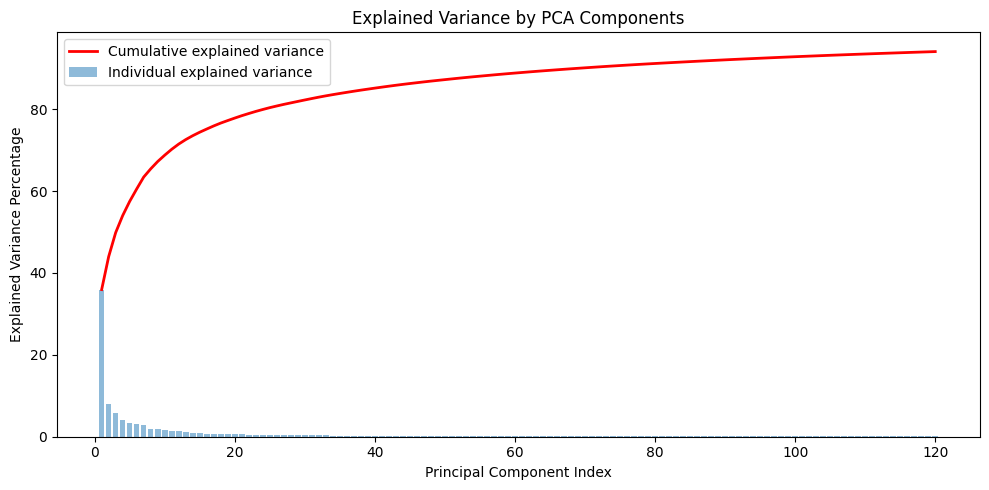

In [41]:
plot_explained_variance(eigenvalues=eigenvalues)

## Visualization of the Mean Face and Eigenfaces

After performing Principal Component Analysis (PCA) on our dataset, we are left with eigenvectors that represent the principal components. These components are essentially the "eigenfaces," which are the directions of the greatest variance within our face dataset.

### The Mean Face

The mean face is computed by averaging each pixel across all images. This gives us a baseline face that represents the average features of all the faces in the dataset.

### Eigenfaces

Each eigenvector from the PCA can be visualized as an eigenface. These eigenfaces highlight the most significant features that can reconstruct all the faces in the dataset when combined. They are the essence of what PCA is capturing about the facial data.

Let's go through the process of visualizing these eigenfaces:

1. **Calculate the Mean Face**: We start by computing the mean face, which is the average of all faces in the dataset.
2. **Display the Mean Face**: The mean face is then displayed to give us an idea of the average features.
3. **Normalize and Display Eigenfaces**: For each eigenface, we normalize its pixel values to the range of 0-255 to ensure proper visualization. Each eigenface is reshaped back to the original dimensions of the images and displayed.

These eigenfaces can be used for various applications such as face recognition, face reconstruction, and more.

In [42]:
def display_mean_and_eigenvectors(input_vector: np.array,
                                  eigenvectors: np.array,
                                  image_shape: tuple = (120, 120, 3),
                                  num_components_to_display: int = 10):
    """
    Display the mean image and a grid of eigenvectors (eigenfaces) of the dataset.
    
    Args:
        - input_vector (numpy.ndarray): The array of flattened images.
        - eigenvectors (numpy.ndarray): The matrix of eigenvectors computed from PCA.
        - image_shape (tuple): The shape to reshape the flattened images back into.
        - num_components_to_display (int): The number of principal components to display in a grid.
    """
    # Calculate the mean image from the input vector
    mean_image = np.mean(input_vector, axis=0)

    # Display the mean image
    plt.figure(figsize=(4, 4))
    plt.imshow(Image.fromarray(np.uint8(mean_image.reshape(image_shape))))
    plt.title('Mean Face')
    plt.axis('off')
    plt.show()

    # Determine the number of rows and columns for the grid
    grid_cols = int(np.ceil(np.sqrt(num_components_to_display)))
    grid_rows = int(np.ceil(num_components_to_display / grid_cols))

    # Create a figure with subplots in a grid
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 15))
    axes = axes.flatten()  # Flatten the 2D array of axes

    # Display each eigenvector as an eigenface in the grid
    for i in range(num_components_to_display):
        eigen_vec = eigenvectors[:, i]
        # Normalize the eigenvector to be in the range [0, 255] for display
        normalized_eigen_vec = 255 * (eigen_vec - np.min(eigen_vec)) / (np.max(eigen_vec) - np.min(eigen_vec))
        # Reshape the eigenvector to the original image shape
        eigenface = normalized_eigen_vec.reshape(image_shape)
        # Display the eigenface
        ax = axes[i]
        ax.imshow(Image.fromarray(np.uint8(eigenface)), cmap='gray')
        ax.set_title(f'Eigenface {i+1}')
        ax.axis('off')  # Hide axes

    # Hide any unused axes if the number of components is not a perfect square
    for i in range(num_components_to_display, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

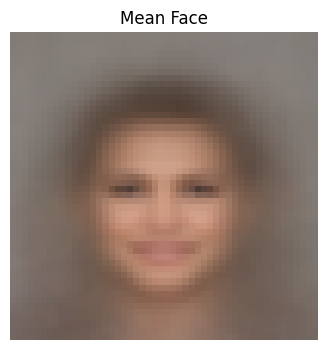

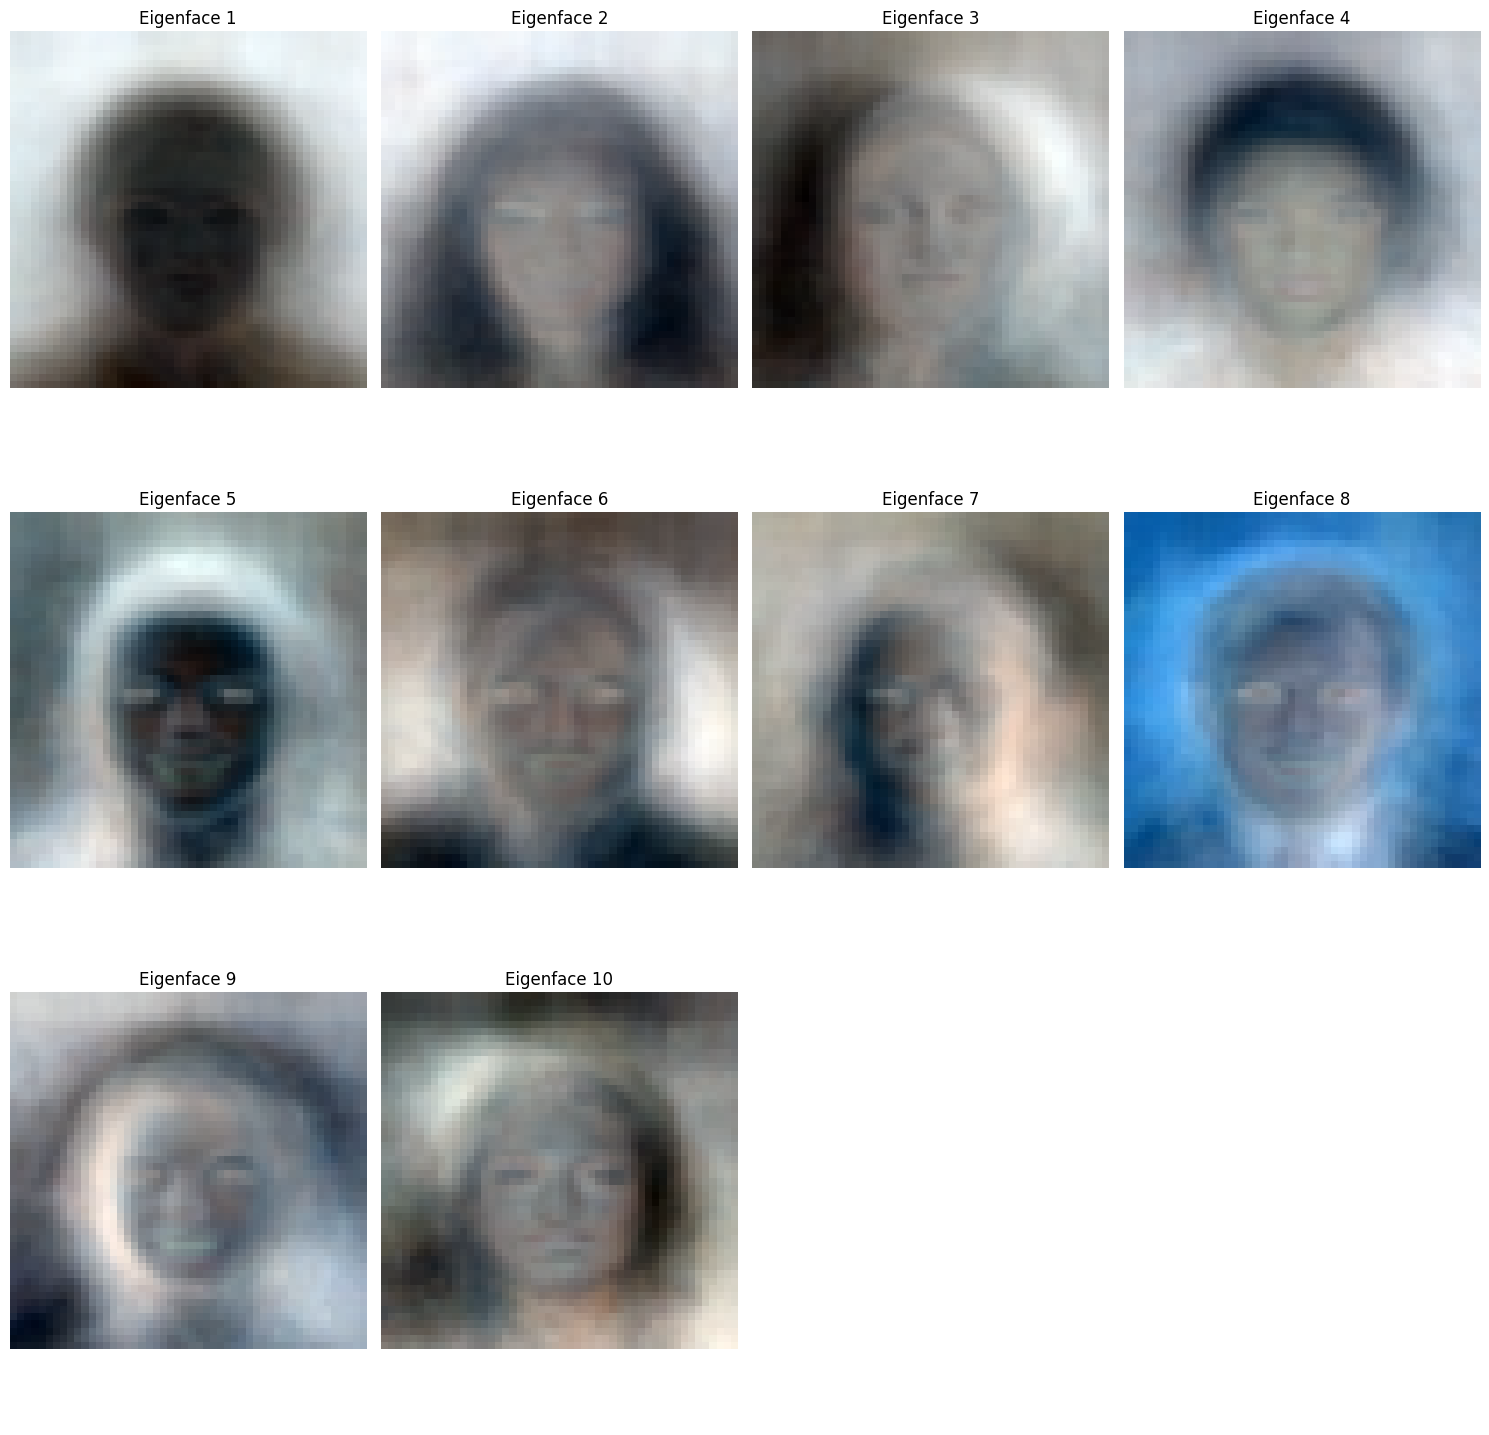

In [43]:
# Display the mean image and a grid of eigenvectors (eigenfaces) of the dataset
display_mean_and_eigenvectors(input_vector=input_vector, eigenvectors=eigenvectors, image_shape=(50, 50, 3))

## Modes of Variation in PCA

In PCA, the eigenvectors represent the directions of maximum variance in the dataset, often called the "principal components." By altering these components, we can observe how they affect the overall data reconstruction.

### Functionality of `display_modes_of_variation`

The `display_modes_of_variation` function visualizes how changes along a single principal component can alter the reconstructed image. This is achieved by scaling the selected eigenvector (from the PCA output) with a range of standard deviations and adding this to the mean image.

### How It Works

1. **Standard Deviation Range**: The function takes a list of standard deviations to apply to the eigenvector.
2. **Scaling the Eigenvector**: Each eigenvector is multiplied by the corresponding standard deviation and the square root of its eigenvalue.
3. **Adding Variation**: The scaled eigenvector is added to the mean image to create a varied image.
4. **Normalization**: The resulting varied image is clipped to ensure the pixel values are within the valid range for display.
5. **Grid Display**: The function plots these variations in a grid layout, where each subplot corresponds to a different standard deviation, showcasing the effect of that variation.

Through this visualization, students can better understand the influence of individual principal components on the data and the concept of variance in PCA.

In [44]:
def display_modes_of_variation(mean_img: np.array, eigenvectors: np.array, eigenvalues: np.array, comp: int = 4, image_shape: tuple = (50, 50, 3), std_devs: np.array = np.arange(-3.0, 3.25, 0.25)):
    """
    Display modes of variation by adding scaled eigenvectors to the mean image.

    Args:
        mean_img (numpy.ndarray): The mean of the original flattened images.
        eigenvectors (numpy.ndarray): Matrix where each column is an eigenvector.
        eigenvalues (numpy.ndarray): Array of eigenvalues corresponding to the eigenvectors.
        comp (int): The index of the eigenvector to vary.
        image_shape (tuple): The shape to convert flattened images back into.
        std_devs (list or numpy.ndarray): The standard deviations to scale the eigenvector.
    """
    # Determine the grid size for plotting
    grid_size = int(np.ceil(np.sqrt(len(std_devs))))
    
    # Create a figure with subplots in a grid
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 2, grid_size * 2))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Loop through each standard deviation
    for i, std in enumerate(std_devs):
        # Scale the chosen eigenvector by the current standard deviation and eigenvalue
        variation = eigenvectors[:, comp] * std * np.sqrt(eigenvalues[comp])
        # Add the variation to the mean image
        varied_image = (mean_img + variation).reshape(image_shape)
        # Normalize the image for proper display
        varied_image = np.clip(varied_image, 0, 255)
        
        # Display the varied image
        axes[i].imshow(Image.fromarray(np.uint8(varied_image)), cmap='gray')
        axes[i].set_title(f'{std:.2f} STDs')
        axes[i].axis('off')  # Hide axes for a cleaner look

    # Hide any unused subplots if the number of std_devs isn't a perfect square
    for ax in axes[len(std_devs):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

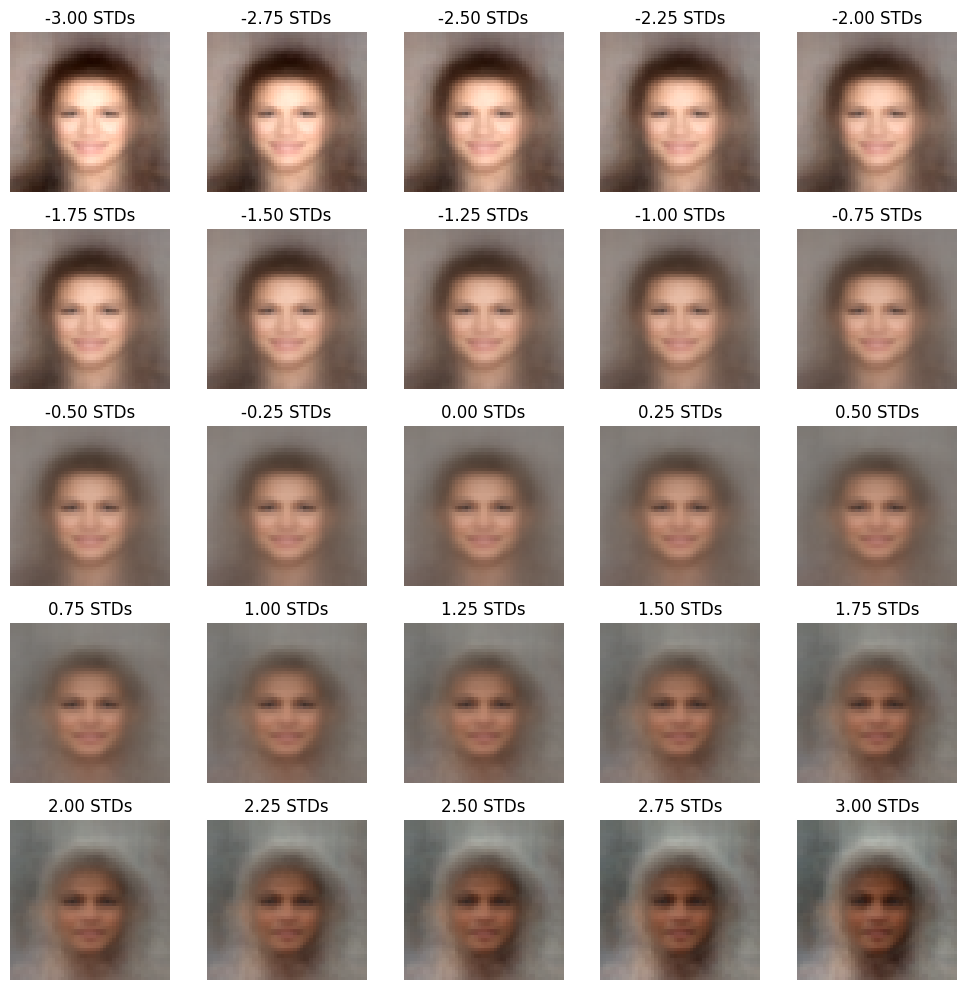

In [45]:
# Inspect the "Modes of Variation"
# Calculate the mean of the images
mean_img = np.mean(input_vector, axis=0)

# The original shape of the images
image_shape = (50, 50, 3) 

# Fifth eigenvector (indexing starts from 0) 
comp = 4 

# A range of standard deviations, from -3 to 3
std_devs = np.arange(-3.0, 3.25, 0.25)  

display_modes_of_variation(mean_img=mean_img,
                           eigenvectors=eigenvectors,
                           eigenvalues=eigenvalues,
                           image_shape=image_shape,
                           comp=comp,
                           std_devs=std_devs)

## Image Reconstruction using Principal Components

In this section, we explore the reconstruction of images using different numbers of principal components obtained from PCA. This process helps us understand how the number of components affects the quality of the reconstructed image.

### The Reconstruction Process

1. **Original Image**: We start by displaying the original image for comparison.
2. **Reconstruction Loop**: We then reconstruct the image using an increasing number of principal components. This is done in a loop where each iteration uses one additional component.
3. **Truncation of Eigenvectors**: In each iteration, we truncate the eigenvectors matrix to the current number of components.
4. **Projection and Reconstruction**: We project the original image onto the truncated eigenspace and then reconstruct it by adding back the mean image.
5. **Visualization in a Grid**: The original image and each reconstructed image are displayed in a grid. This allows us to visually compare how the reconstruction quality improves as more components are used.

### Visual Insights

By observing the reconstructions, we can see that as we increase the number of components, the reconstructed image becomes more and more similar to the original. This demonstrates the power of PCA in capturing the most significant features of the image data

In [46]:
def display_reconstruction_comparison(original_images: np.array,
                                      eigenvectors: np.array,
                                      input_vector: np.array,
                                      mean_img: np.array,
                                      image_shape: tuple = (50, 50, 3),
                                      num_components=60,
                                      selected_img: int = 0):
    """
    Display the original image and its reconstructions using an increasing number of principal components.

    Args:
        - original_images (list of numpy.ndarray): The list of original images.
        - eigenvectors (numpy.ndarray): The matrix of eigenvectors computed from PCA.
        - input_vector (numpy.ndarray): The array of flattened images used for PCA.
        - mean_img (numpy.ndarray): The mean of the original flattened images.
        - image_shape (tuple): The shape to convert flattened images back into.
        - num_components (int): The number of principal components to use for reconstructions.
        - selected_img (int): The index of the image to be displayed

    This function displays the original image and its reconstructions from a varying number of principal components.
    It helps to visualize how the image reconstruction quality improves with more components.
    """
    # Select the first image for comparison
    original = original_images[selected_img]

    # Determine the grid size for plotting
    grid_cols = int(np.ceil(np.sqrt(num_components + 1)))  # +1 for the original image
    grid_rows = int(np.ceil((num_components + 1) / grid_cols))

    # Create a figure with subplots in a grid
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(grid_cols * 2, grid_rows * 2))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    # Display the original image in the first subplot
    axes[0].imshow(Image.fromarray(np.uint8(original)), cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Iterate over the range of components for reconstruction
    for n_dims in range(1, num_components + 1):
        # Truncate the eigenvectors to the current number of dimensions
        p_trunc = eigenvectors[:, :n_dims]
        # Project the original image onto the truncated eigenspace
        y_k = p_trunc.T @ (input_vector[selected_img] - mean_img)
        # Reconstruct the image from the projection
        reconstruction_vec = mean_img + p_trunc @ y_k
        # Reshape the reconstruction vector back into an image
        reconstruction_img = reconstruction_vec.reshape(image_shape)
        # Display the reconstructed image
        axes[n_dims].imshow(Image.fromarray(np.uint8(reconstruction_img)), cmap='gray')
        axes[n_dims].set_title(f'{n_dims} Components')
        axes[n_dims].axis('off')

    # Turn off any unused subplots
    for ax in axes[num_components + 1:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()



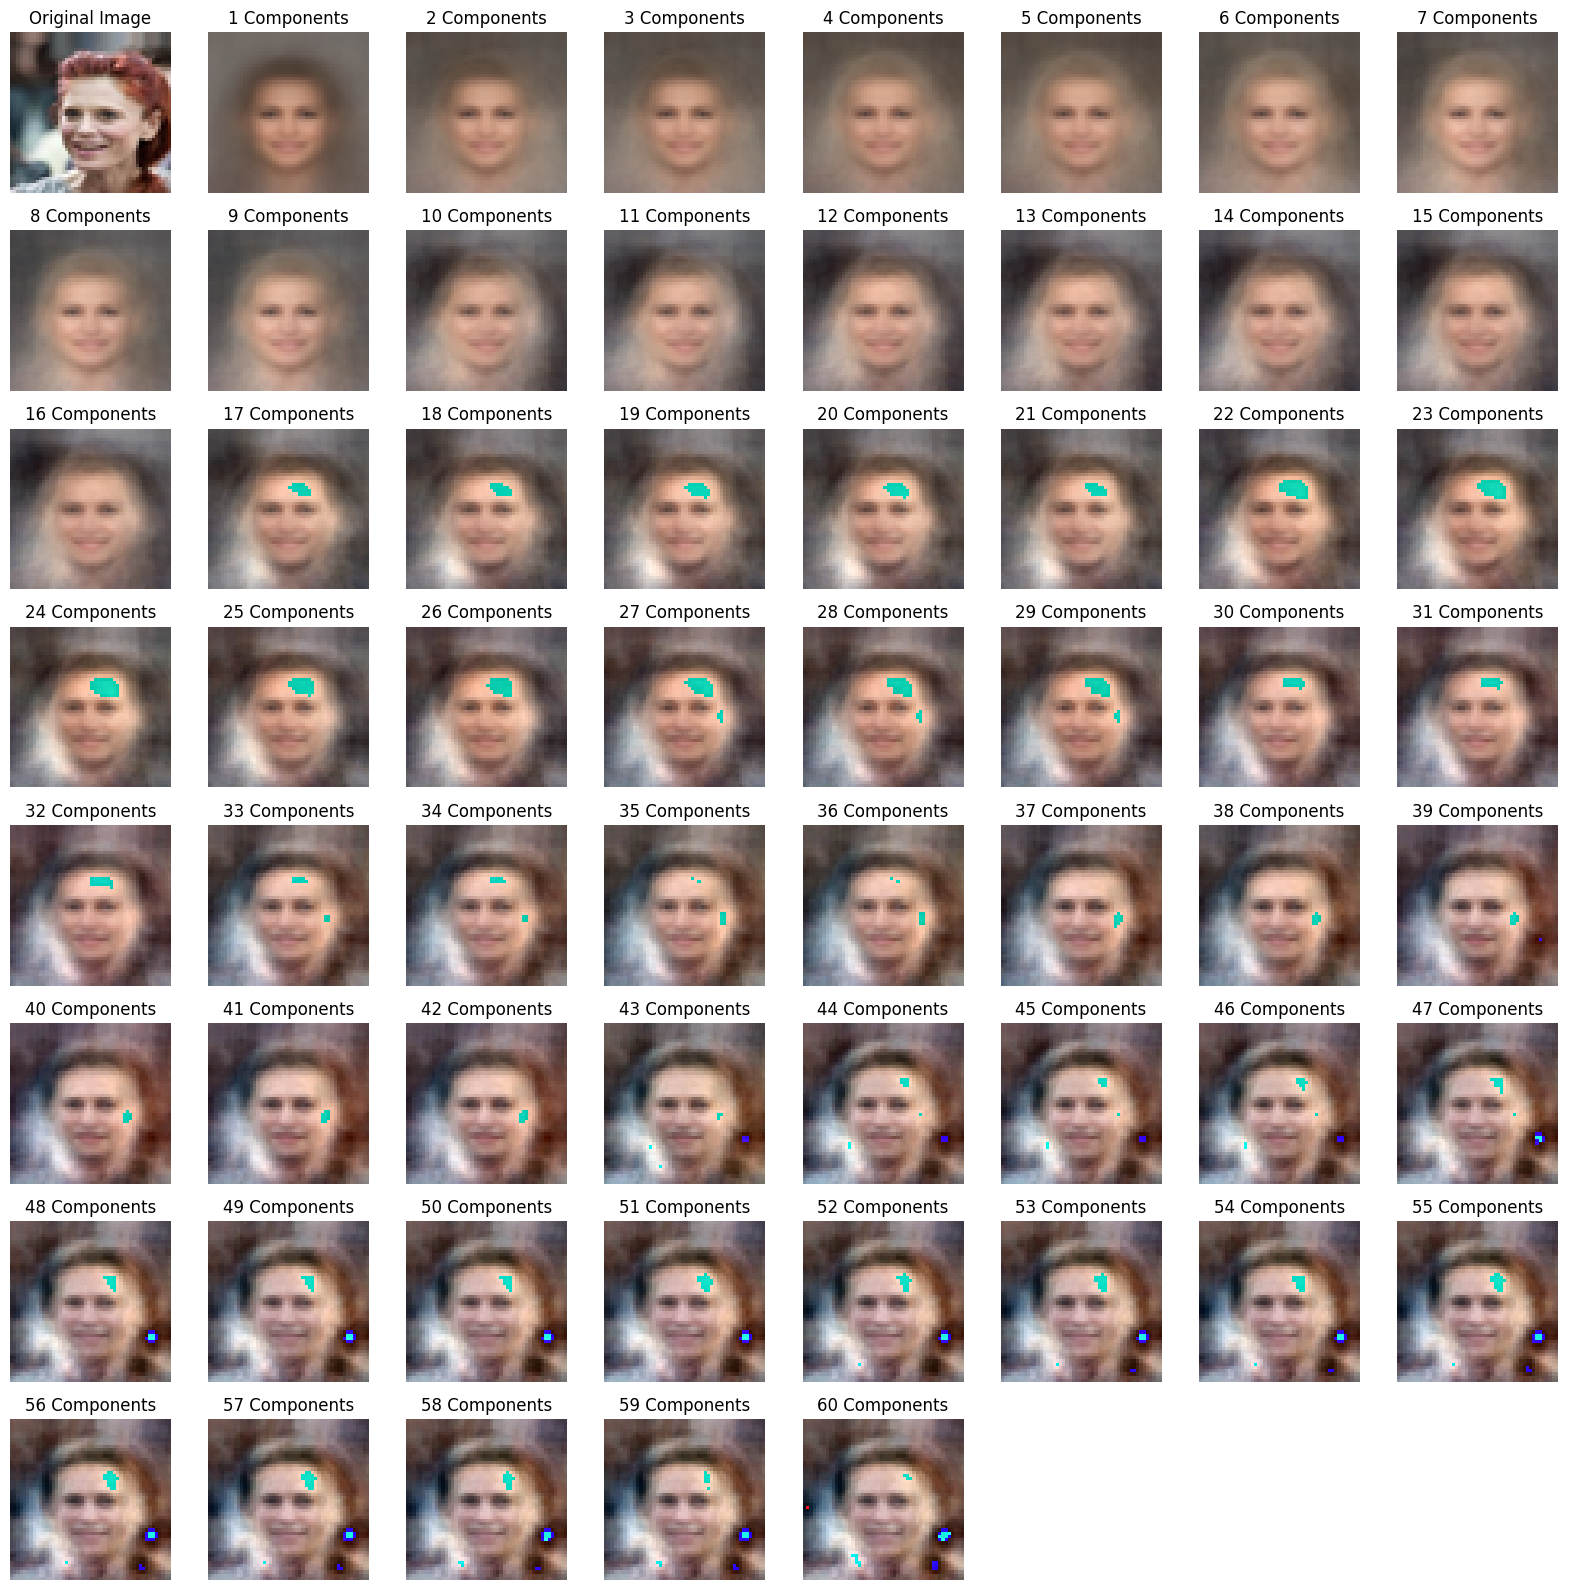

In [47]:
display_reconstruction_comparison(original_images=original_images,
                                  eigenvectors=eigenvectors,
                                  input_vector=input_vector,
                                  image_shape=(50, 50, 3),
                                  mean_img=mean_img,
                                  num_components=60,
                                  selected_img=1)